# Topological Data Analysis of Financial Time Series: Landscapes of Crashes


In this notebook we reproduce the results presented on [Topological Data Analysis of Financial Time Series: Landscapes of Crashes by Gidea and Katz](https://www.sciencedirect.com/science/article/abs/pii/S0378437117309202). 

The method consists of analyzing the persistence landscape time series of point clouds of major indices during the technology crash of 2000, and the financial crisis of 2007-2009. Remarkably, the time series of  𝐿𝑝 -norms of the persistence landscapes demonstrates a strong rising trend for 250 trading days prior to either dotcom crash on 03/10/2000, or to the Lehman bankruptcy on 09/15/2008.

In [1]:
import pandas as pd
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf
import numpy as np
import datetime as dt

import gudhi as gd
import gudhi.representations
from gudhi.representations import Landscape
import matplotlib.pyplot as plt

We analyze the daily time series of four major US stock market indices: S&P 500, DJIA, NASDAQ, and Russel 2000 between December 23, 1987 and December 08, 2016 (7301 trading days). The times series data were downloaded from Yahoo Finance.

In [2]:
indices = ['^GSPC','^DJI', '^IXIC', '^RUT']

In [3]:
# Download closing prices
data = pdr.get_data_yahoo(indices, start="1987-12-23", end='2016-12-08')['Close']
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7301 entries, 1987-12-23 to 2016-12-08
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ^GSPC   7301 non-null   float64
 1   ^DJI    6284 non-null   float64
 2   ^IXIC   7301 non-null   float64
 3   ^RUT    7301 non-null   float64
dtypes: float64(4)
memory usage: 285.2 KB


The Dow Jones column has some NaN values which we fill with the next valid observation to fill gap.

In [4]:
data.fillna(method="bfill", inplace = True)

For each index and for each trading day we calculate log-returns defined as the forward daily changes in the logarithm of the ratio 

\begin{align*} r_{ij} & = \log(P_{i,j}/P_{i-1,j}) \\
\end{align*}


where $P_{i,j}$ represents the adjusted closing value of the index $j$ at the day $i$. 

In [5]:
log_returns = np.log(data/data.shift(1))

In [6]:
log_returns.drop(log_returns.index[[0]], inplace = True)

In our approach, the point cloud is formed by $w=50$ points in $\mathbb{R}^4$, where the coordinates of each point in $\mathbb{R}^4$ represent the daily log-returns. The sliding step is set to one day, which in the case under consideration yields a $(7300-w)$ time-ordered set of point clouds.

In [7]:
X_clouds = np.lib.stride_tricks.sliding_window_view(log_returns, window_shape = (50,4))

## Lehman Persistence Landscapes

The next graph offers illustrates how as the stock market becomes more volatile, loops in the relevant point clouds become much more pronounced. This is the persistence diagram of the point cloud that starts with the date of the Lehman bankruptcy on 09/15/2008. 

In [13]:
lehman_days_9_15 = log_returns['1987-12-24': '09-15-2008'].shape[0]
lehman_cloud_9_15 = X_clouds[lehman_days_9_15 - 50][0]

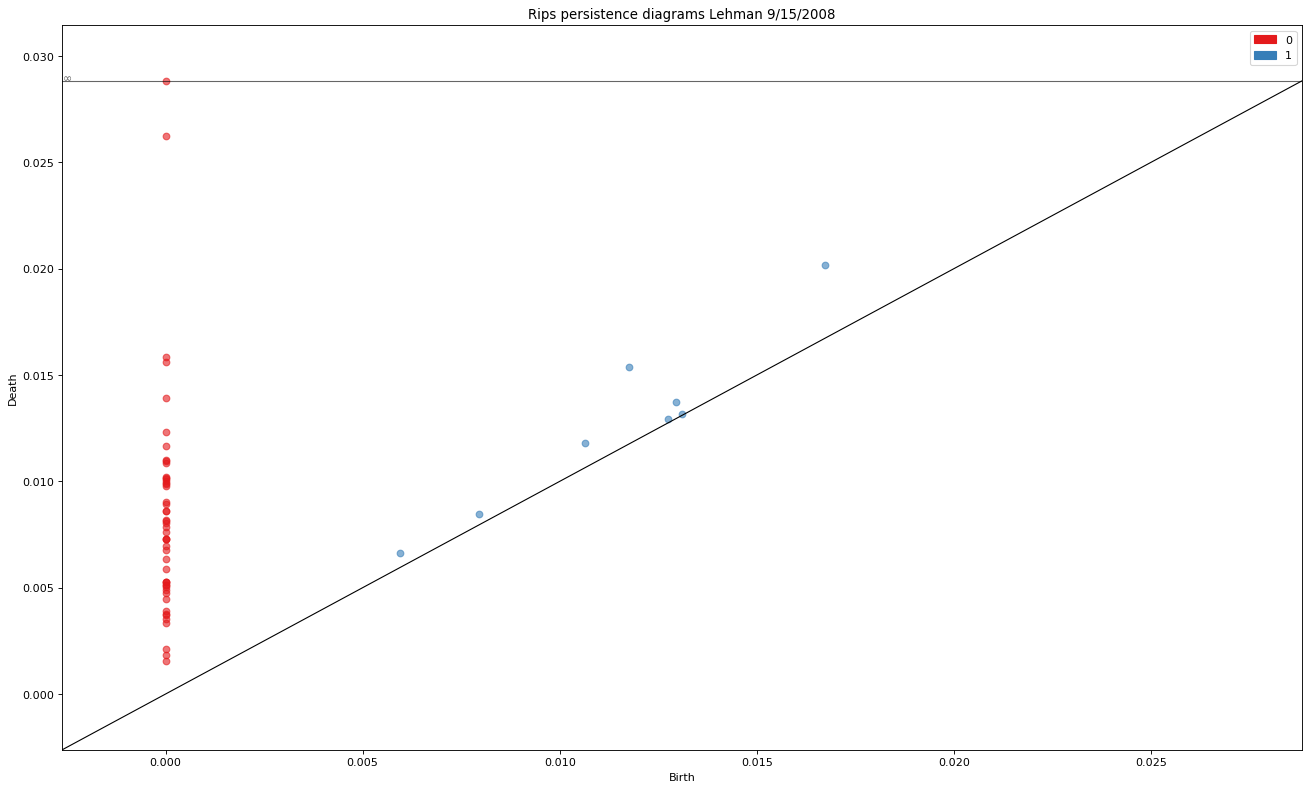

In [14]:
rips_c_lehman_9_15 = gd.RipsComplex(points=lehman_cloud_9_15).create_simplex_tree(max_dimension=2)
dgm = rips_c_lehman_9_15.persistence()
fig = plt.figure(figsize=(20, 12), dpi=80)
ax = fig.add_subplot()
gd.plot_persistence_diagram(dgm, axes = ax, legend = True)
plt.title("Rips persistence diagrams Lehman 9/15/2008");

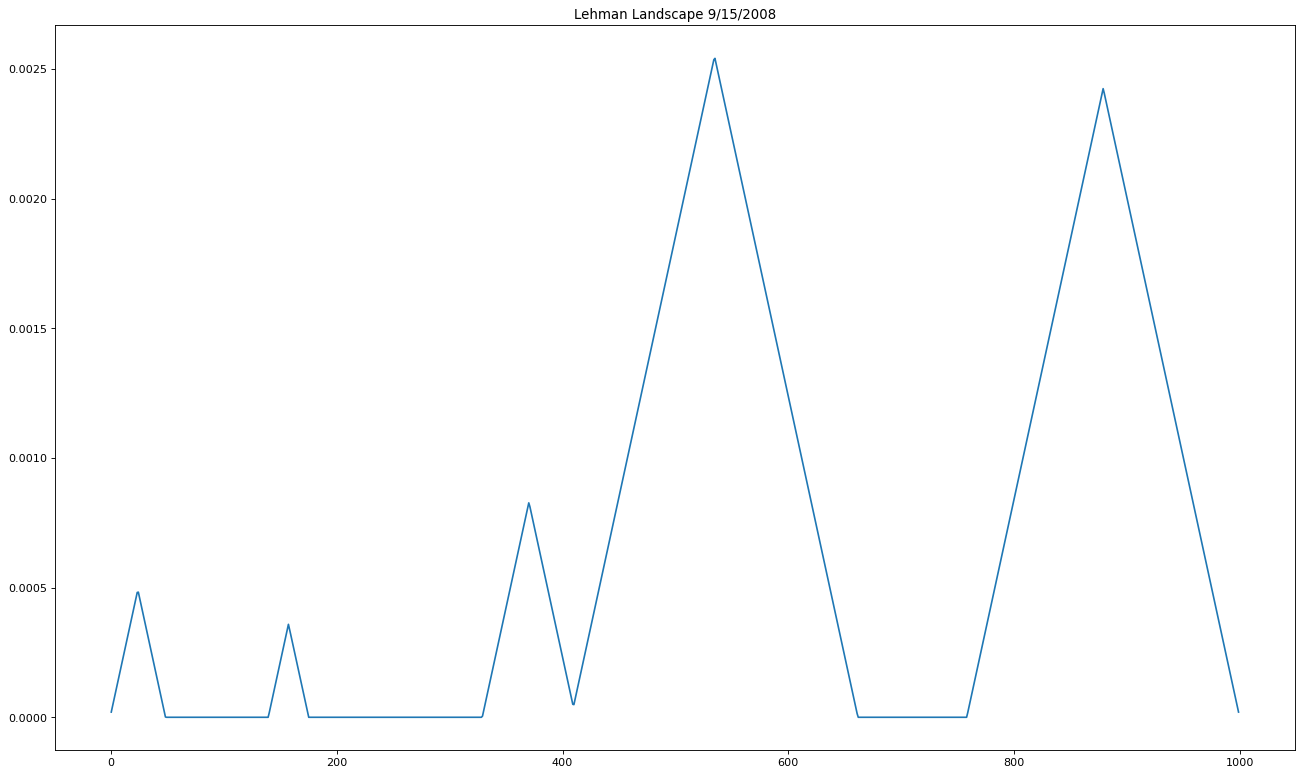

In [15]:
LS = gd.representations.Landscape(num_landscapes=1, resolution=1000)
L = LS.fit_transform([rips_c_lehman_9_15.persistence_intervals_in_dimension(1)])
y = L[0][:1000]
fig = plt.figure(figsize=(20, 12), dpi=80)
ax = fig.add_subplot()
plt.plot(y)
plt.title("Lehman Landscape 9/15/2008")
plt.show()

Two months earlier, landscapes had a lower $L^1$ norm.

In [16]:
lehman_days_7_15 = log_returns['1987-12-24': '07-15-2008'].shape[0]
lehman_cloud_7_15 = X_clouds[lehman_days_7_15 - 50][0]

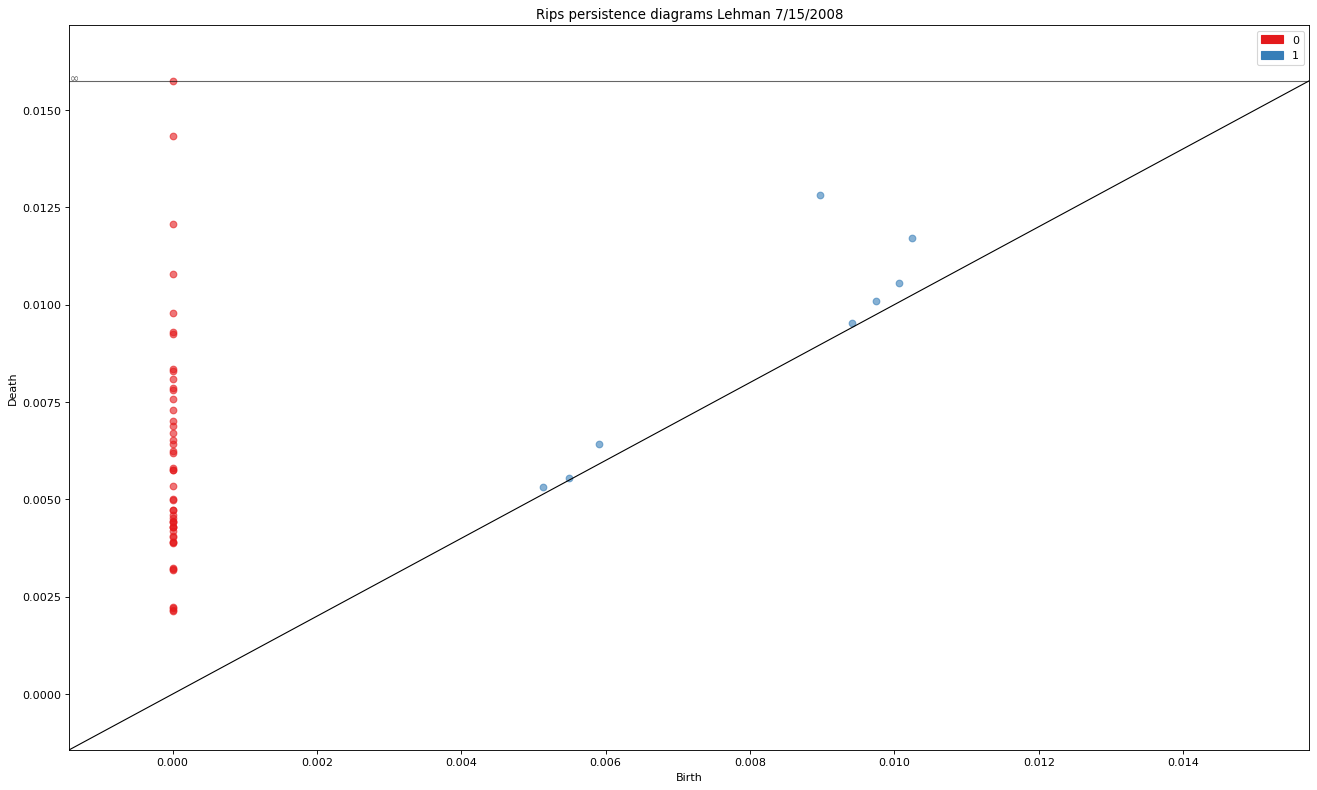

In [18]:
rips_c_lehman_7_15 = gd.RipsComplex(points=lehman_cloud_7_15).create_simplex_tree(max_dimension=2)
dgm = rips_c_lehman_7_15.persistence()
fig = plt.figure(figsize=(20, 12), dpi=80)
ax = fig.add_subplot()
gd.plot_persistence_diagram(dgm, axes = ax, legend = True)
plt.title("Rips persistence diagrams Lehman 7/15/2008");

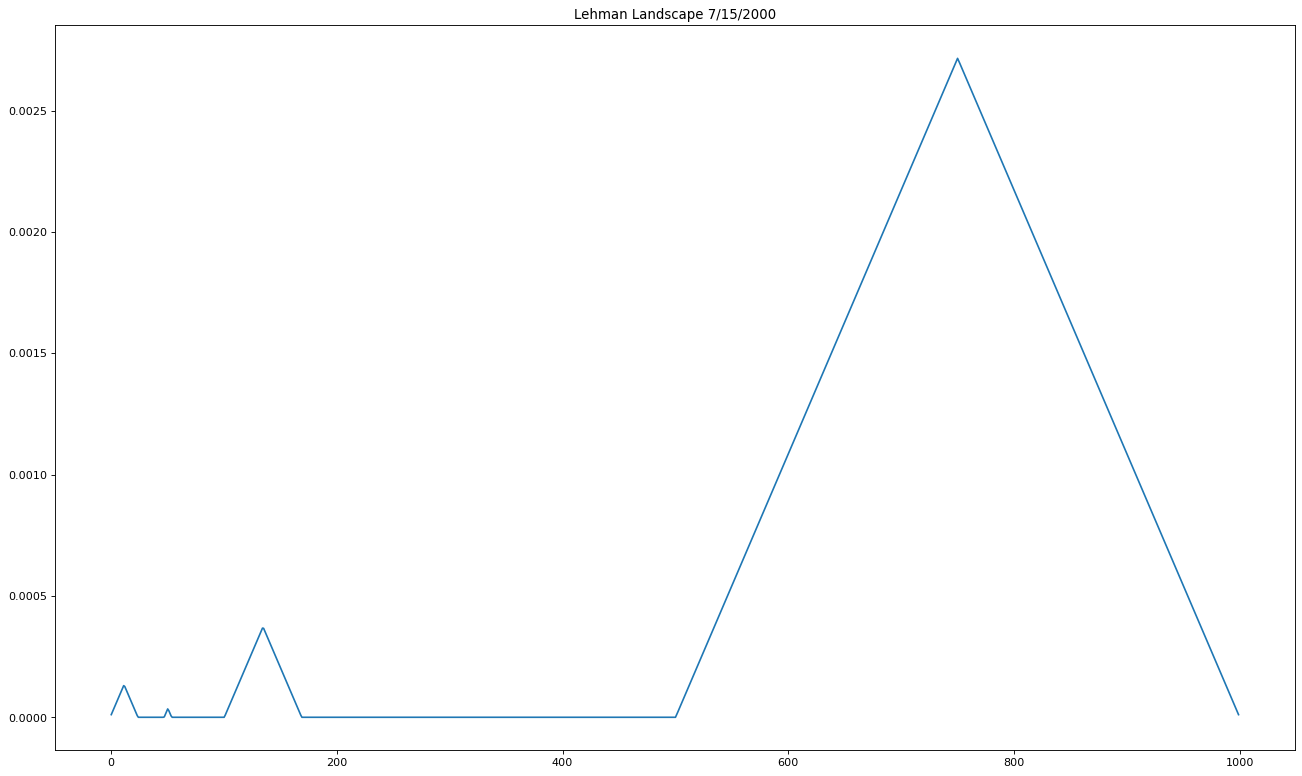

In [20]:
landscapes = gd.representations.Landscape(num_landscapes=1, resolution=1000)
l = landscapes.fit_transform([rips_c_lehman_7_15.persistence_intervals_in_dimension(1)])
y = l[0][:1000]
fig = plt.figure(figsize=(20, 12), dpi=80)
ax = fig.add_subplot()
plt.plot(y)
plt.title("Lehman Landscape 7/15/2000")
plt.show()

## Dot-Com Persistence Landscapes

We compare the persistence landscapes on the critical date Dot-Com crash of March 10, 2000 and two months prior.

In [21]:
dotcom_days_3_10 = log_returns['1987-12-24': '03-10-2000'].shape[0]
dotcom_cloud_3_10 = X_clouds[dotcom_days_3_10-50][0]

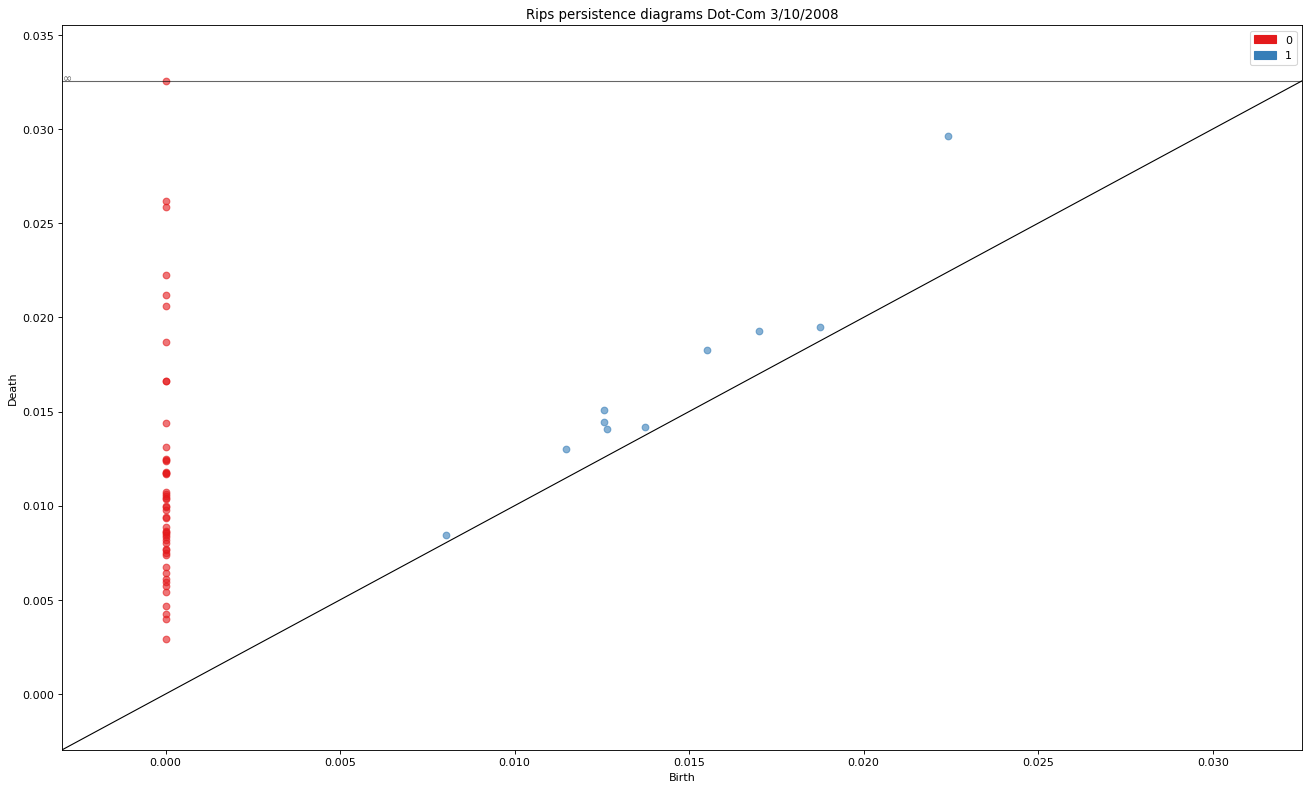

In [23]:
rips_c_dotcom_3_10 = gd.RipsComplex(points=dotcom_cloud_3_10).create_simplex_tree(max_dimension=2)
dgm = rips_c_dotcom_3_10.persistence()
fig = plt.figure(figsize=(20, 12), dpi=80)
ax = fig.add_subplot()
gd.plot_persistence_diagram(dgm, axes = ax, legend = True)
plt.title("Rips persistence diagrams Dot-Com 3/10/2008");

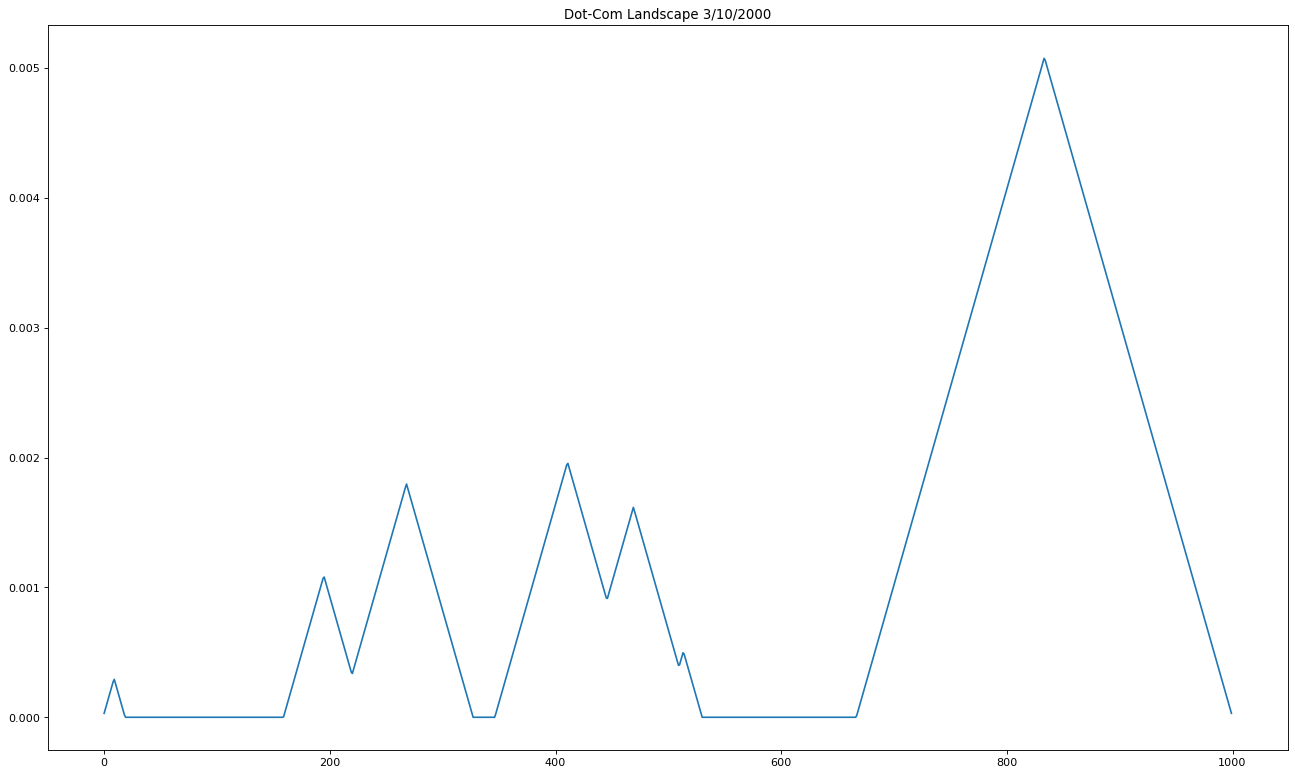

In [24]:
LS = gd.representations.Landscape(num_landscapes=1, resolution=1000)
L = LS.fit_transform([rips_c_dotcom_3_10.persistence_intervals_in_dimension(1)])
y = L[0][:1000]
fig = plt.figure(figsize=(20, 12), dpi=80)
ax = fig.add_subplot()
plt.plot(y)
plt.title("Dot-Com Landscape 3/10/2000")
plt.show()

Persistence of the cloud two months before crash (1/10/2000)

In [25]:
dotcom_days_1_10 = log_returns['1987-12-24': '01-10-2000'].shape[0]
dotcom_cloud_1_10 = X_clouds[dotcom_days_1_10-50][0]

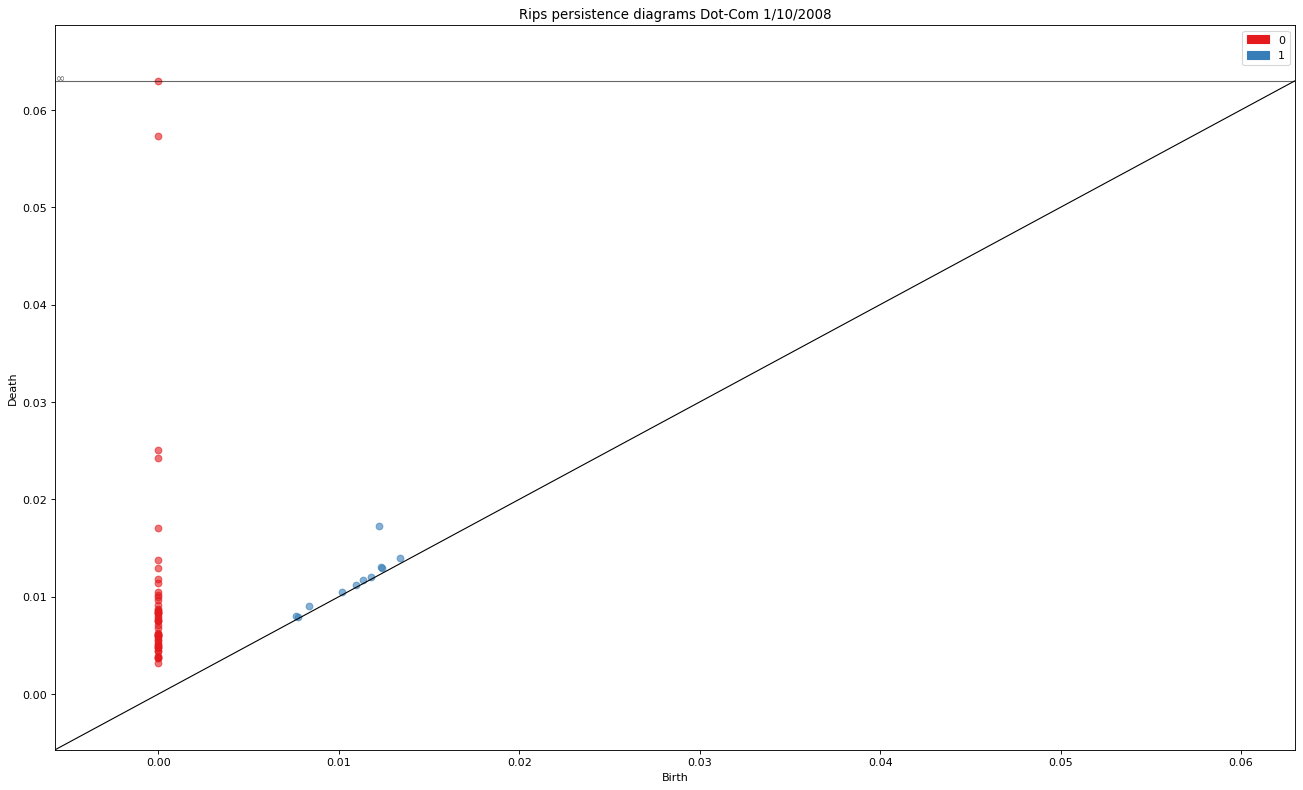

In [27]:
rips_c_dotcom_1_10 = gd.RipsComplex(points=dotcom_cloud_1_10).create_simplex_tree(max_dimension=2)
dgm = rips_c_dotcom_1_10.persistence()
fig = plt.figure(figsize=(20, 12), dpi=80)
ax = fig.add_subplot()
gd.plot_persistence_diagram(dgm, axes = ax, legend = True)
plt.title("Rips persistence diagrams Dot-Com 1/10/2008");

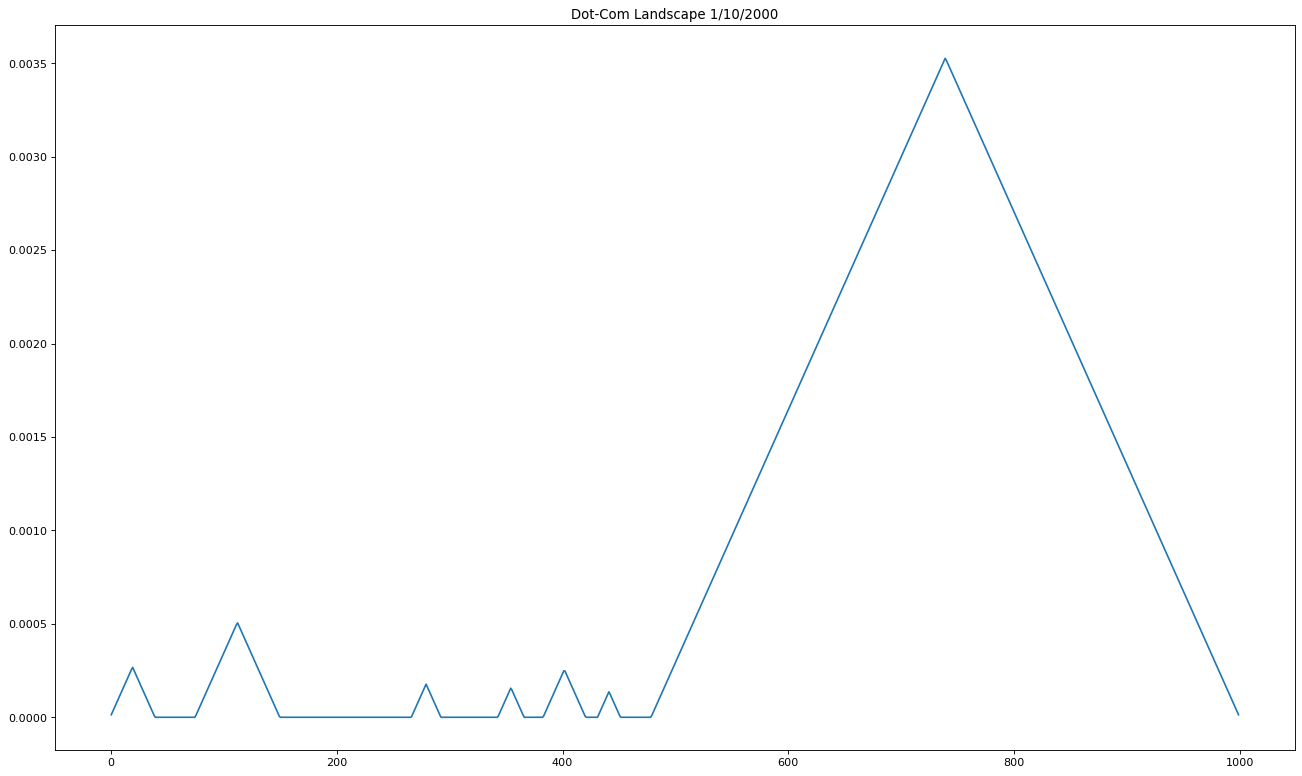

In [28]:
LS = gd.representations.Landscape(num_landscapes=1, resolution=1000)
L = LS.fit_transform([rips_c_dotcom_1_10.persistence_intervals_in_dimension(1)])
y = L[0][:1000]
fig = plt.figure(figsize=(20, 12), dpi=80)
ax = fig.add_subplot()
plt.plot(y)
plt.title("Dot-Com Landscape 1/10/2000")
plt.show()

## Time Series of Norms of Persistence Landscapes

In [30]:
import scipy.integrate as integrate

In [32]:
norms = []
n = X_clouds.shape[0]-1
for i in range(n):
    #print(i)
    rips_complex = gd.RipsComplex(points=X_clouds[i][0]).create_simplex_tree(max_dimension=2)
    persistence_diagram = rips_complex.persistence()
    landscape = gd.representations.Landscape(num_landscapes=1, resolution=1000)
    l = landscape.fit_transform([rips_complex.persistence_intervals_in_dimension(1)])
    y = l[0][:1000]
    l1_norm = integrate.simps(y, x = None)
    #print(l1_norm)
    norms.append(l1_norm)

In [33]:
#normalize the series of norms
np_norms = np.asarray(norms)
maximum = np_norms.max()
norm_stand = np_norms/maximum

In [38]:
norm_stand.shape

(7250,)

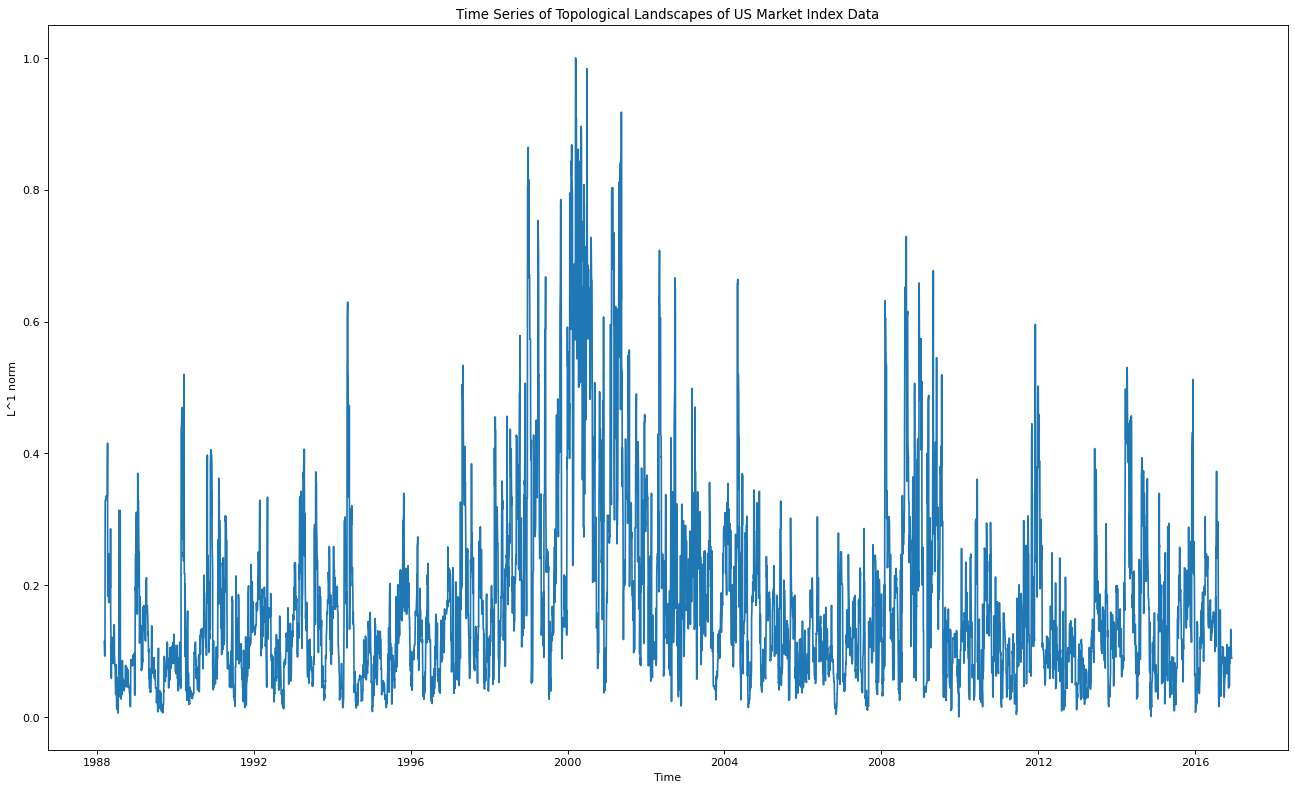

In [43]:
fig = plt.figure(figsize=(20, 12), dpi=80)
ax = fig.add_subplot()
ax.set_ylabel('L^1 norm')
ax.set_xlabel('Time')
plt.plot(log_returns.index[50:], norm_stand)
plt.title("Time Series of Topological Landscapes of US Market Index Data")
plt.show()

## Topological time series near the ‘dotcom crash’ on 03/10/2000

We graph the topological time series, the normalized S&P and ^VIX index 1000 trading-days prior to the Dot-Com crash on 3/10/2000.

In [88]:
vix = pdr.get_data_yahoo("^VIX", start="1987-12-23", end='2016-12-08')['Close']
vix = np.pad(vix.values, (511,0), 'constant', constant_values= 0)
vix_series = pd.Series(vix, data.index)

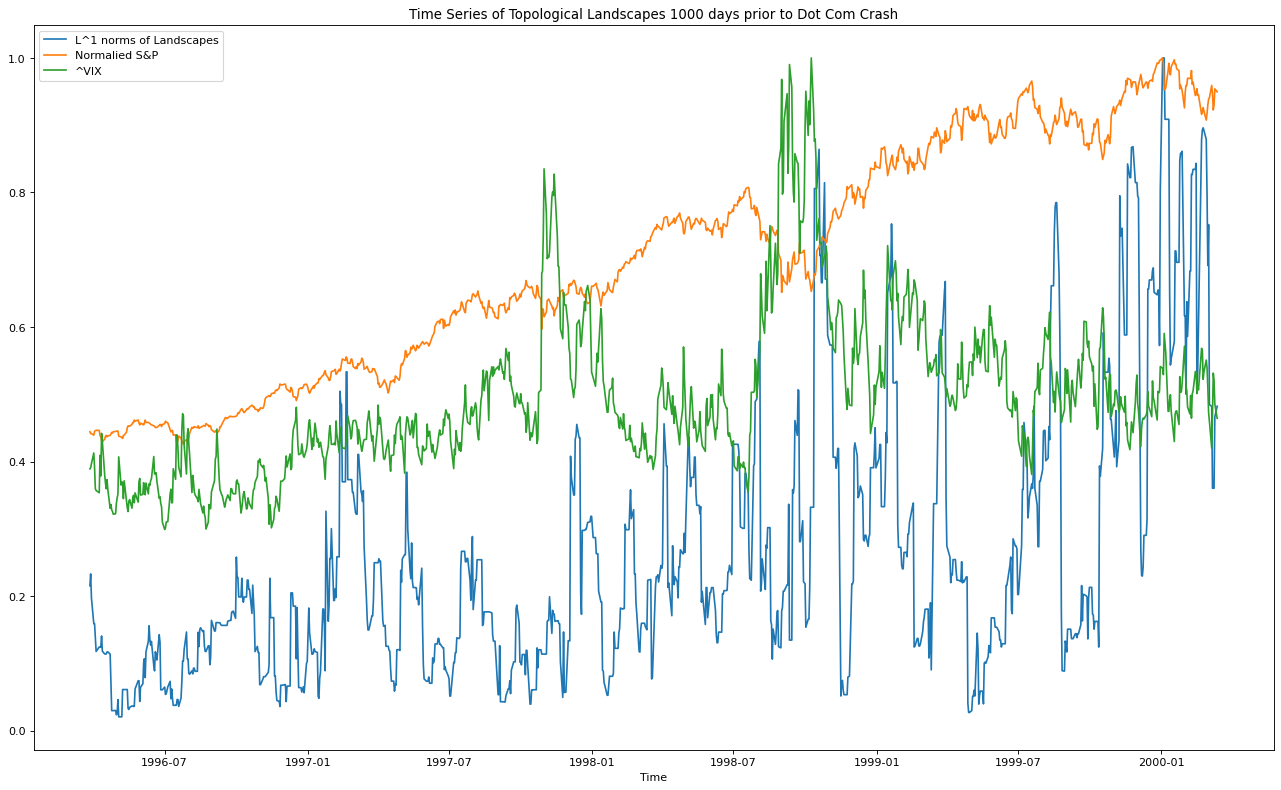

In [97]:
#number of days
dotcom_days_3_10 = log_returns[: '03-10-2000'].shape[0]

#time series of normalized S&P500 
SP_1000days_dc = data['^GSPC'][dotcom_days_3_10-999 : dotcom_days_3_10+1]
SP_maximum = SP_1000days_dc.max()
SP_1000days_dc_norm = SP_1000days_dc/SP_maximum

#normalized VIX
vix_1000days_dc = vix_series[dotcom_days_3_10-999 : dotcom_days_3_10+1]
vix_max_1000_days_dc = vix_1000days_dc.max()
vix_1000days_dc_norm = vix_1000days_dc/vix_max_1000_days_dc


fig = plt.figure(figsize=(20, 12), dpi=80)
ax = fig.add_subplot()
#ax.set_ylabel('L^1 norm')
ax.set_xlabel('Time')

x = log_returns.index[dotcom_days_3_10-999 : dotcom_days_3_10+1]
y = [ norm_stand[dotcom_days_3_10-999 : dotcom_days_3_10+1] , SP_1000days_dc_norm , vix_1000days_dc_norm]
labels = ['L^1 norms of Landscapes', 'Normalied S&P', '^VIX']

for y_arr, label in zip(y, labels):
    plt.plot(x, y_arr, label=label)

plt.legend()
plt.title("Time Series of Topological Landscapes 1000 days prior to Dot Com Crash")
plt.show()

## Proximity of the Lehman bankruptcy on 09/15/2008.


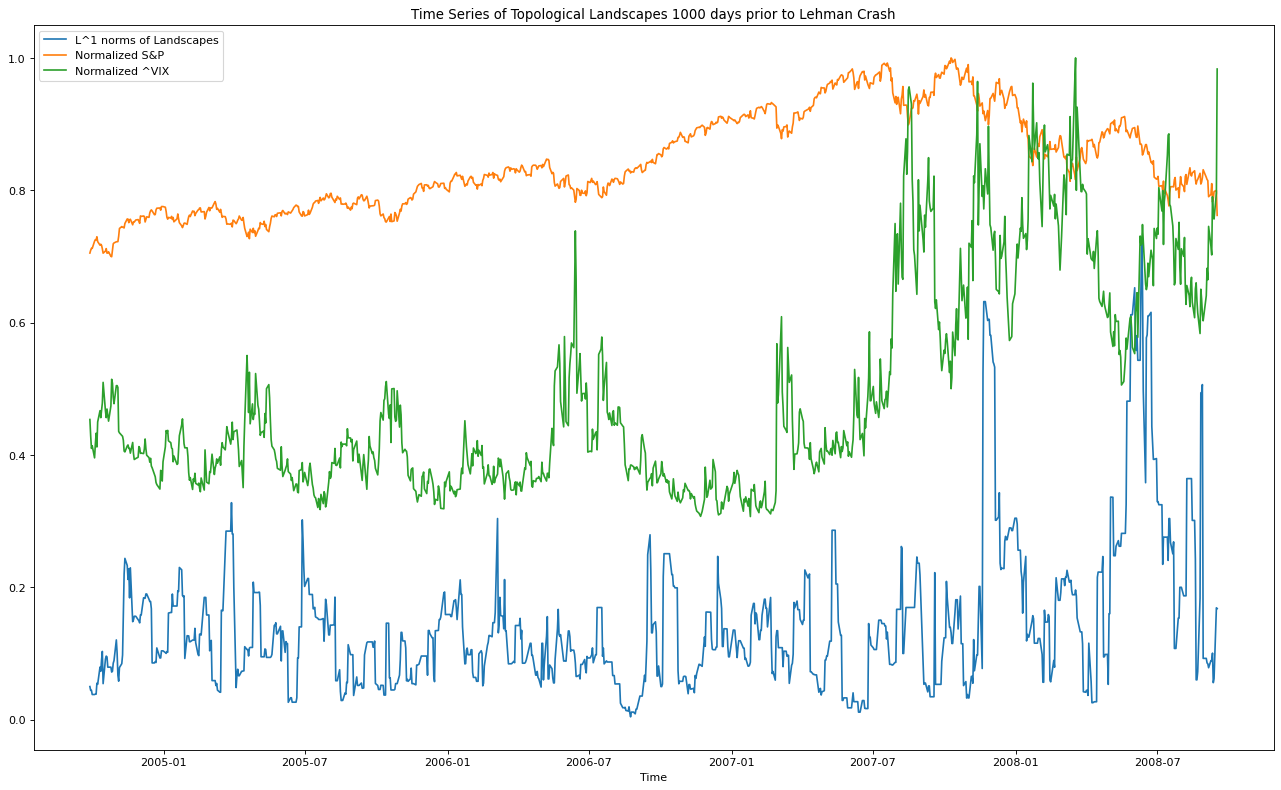

In [98]:
#number of days
lehman_days_9_15 = log_returns[: '09-15-2008'].shape[0]

#time series of normalized S&P500 
SP_1000days_leh = data['^GSPC'][lehman_days_9_15-999 : lehman_days_9_15+1]
maximum = SP_1000days_leh.max()
SP_1000days_leh_norm = SP_1000days_leh/maximum


vix_1000days_leh = vix_series[lehman_days_9_15-999 : lehman_days_9_15+1]
vix_max_1000_days_leh = vix_1000days_leh.max()
vix_1000days_leh_norm = vix_1000days_leh/vix_max_1000_days_leh

fig = plt.figure(figsize=(20, 12), dpi=80)
ax = fig.add_subplot()
#ax.set_ylabel('L^1 norm')
ax.set_xlabel('Time')

x = log_returns.index[lehman_days_9_15-999 : lehman_days_9_15+1]
y = [ norm_stand[lehman_days_9_15-999 : lehman_days_9_15+1] , SP_1000days_leh_norm ,vix_1000days_leh_norm]
labels = ['L^1 norms of Landscapes', 'Normalized S&P', 'Normalized ^VIX']

for y_arr, label in zip(y, labels):
    plt.plot(x, y_arr, label=label)

plt.legend()
plt.title("Time Series of Topological Landscapes 1000 days prior to Lehman Crash")
plt.show()

## Analysis of statistical indicators of the topological time series

We quantify temporal variations in the persistence of loops in the time-ordered set of point clouds with a growing market stress. 

In [103]:
rolling_window = 500
sliding_step = 1

topological_series = pd.Series(norm_stand, index = log_returns.index[50:])

### Variance

The variance of the time series of $L^1$-norms are substantially growing prior to any of the crashes.

In [115]:
#500 day rolling variance
variance_series = topological_series.rolling(window= rolling_window).var()

#### Dot-Com Crash

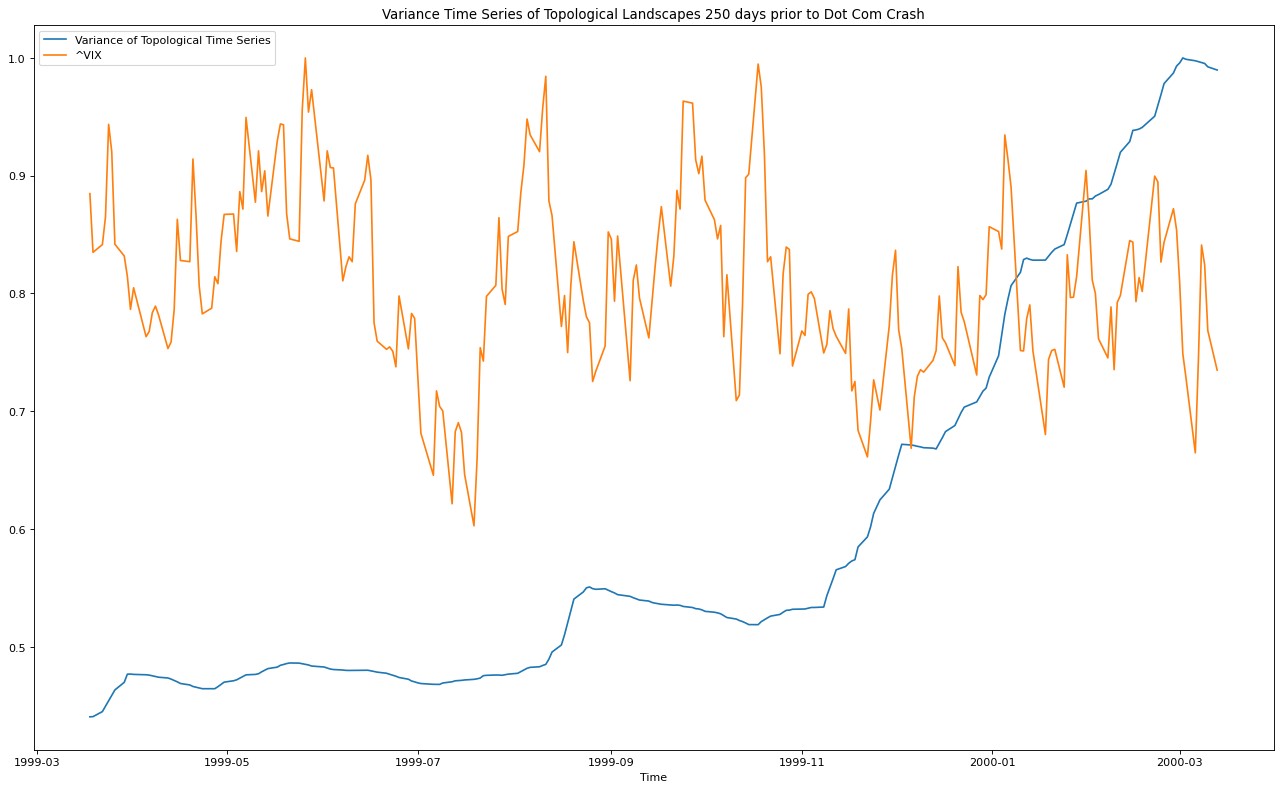

In [116]:
#variance normalized 250 prior to dot-com
variance_250_dc = variance_series[dotcom_days_3_10-249 : dotcom_days_3_10+1]
variance_250_days_dc_norm = variance_250_dc/variance_250_dc.max()

vix_250_days_dc = vix_series[dotcom_days_3_10-249 : dotcom_days_3_10+1]
vix_max_250_days_dc = vix_250_days_dc.max()
vix_250_days_dc_norm = vix_250_days_dc/vix_max_250_days_dc

fig = plt.figure(figsize=(20, 12), dpi=80)
ax = fig.add_subplot()
ax.set_xlabel('Time')

x = log_returns.index[dotcom_days_3_10-249 : dotcom_days_3_10+1]
y = [variance_250_days_dc_norm  , vix_250_days_dc_norm]
labels = ['Variance of Topological Time Series', '^VIX' ]

for y_arr, label in zip(y, labels):
    plt.plot(x, y_arr, label=label)

plt.legend()
plt.title("Variance Time Series of Topological Landscapes 250 days prior to Dot Com Crash")
plt.show()

#### Lehman 

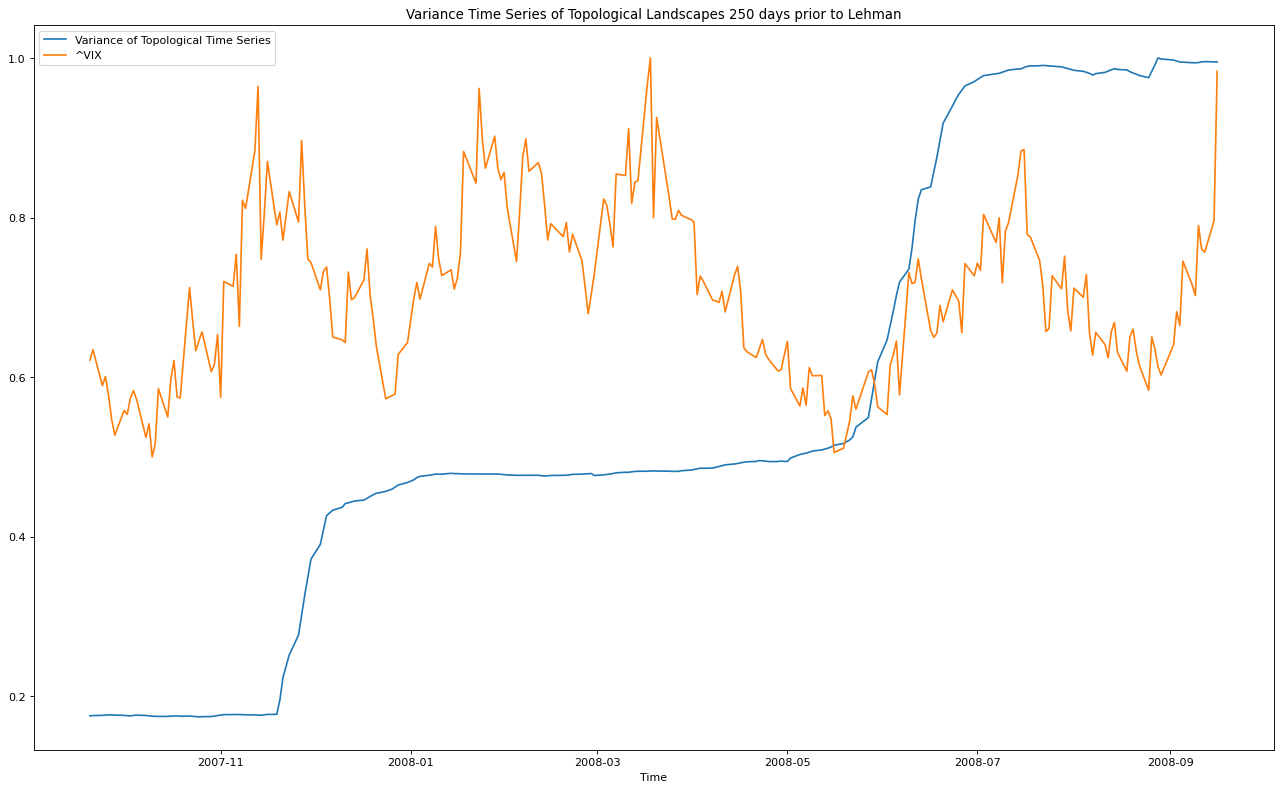

In [117]:
#variance normalized 250 prior to lehman
variance_250_leh = variance_series[lehman_days_9_15-249 : lehman_days_9_15+1]
variance_250_days_leh_norm = variance_250_leh/variance_250_leh.max()

vix_250_days_leh = vix_series[lehman_days_9_15-249 : lehman_days_9_15+1]
vix_max_250_days_leh = vix_250_days_leh.max()
vix_250_days_leh_norm = vix_250_days_leh/vix_max_250_days_leh


fig = plt.figure(figsize=(20, 12), dpi=80)
ax = fig.add_subplot()
ax.set_xlabel('Time')

x = log_returns.index[lehman_days_9_15-249 : lehman_days_9_15+1]
y = [variance_250_days_leh_norm , vix_250_days_leh_norm]
labels = ['Variance of Topological Time Series', '^VIX' ]

for y_arr, label in zip(y, labels):
    plt.plot(x, y_arr, label=label)

plt.legend()
plt.title("Variance Time Series of Topological Landscapes 250 days prior to Lehman")
plt.show()

### Average spectral density

In [119]:
from scipy import signal

### Auto-correlation function (ACF)